## Census Income

#### Importing liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Census Income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
### seprating numerical columns and 
col_obj = df.select_dtypes("O").columns.tolist()
print("object columns :",col_obj)
col_int = df.select_dtypes(np.number).columns.tolist()
print("Numeric columns :",col_int)

object columns : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numeric columns : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [7]:
### Droping duplicate values
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [8]:
### Removing white space from dataset
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
### Checking number of unique values
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

* dataset have 24 duplicate values
* dataset have 6 numerical columns and 9 Object columns 

#### Exploratory data analysis

##### Lebale encoding

In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()
for i in col_obj:
    df[i] = lb.fit_transform(df[i])
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0


In [12]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


* Capital_gain and Capital_loss have Min value Q1,Q2 and Q3 all value are 0 and max value have significat diffrent hance dataset have outliers 
* min Hours_per_week is 1 and max is 99 also Q3 and max value have some outliers 

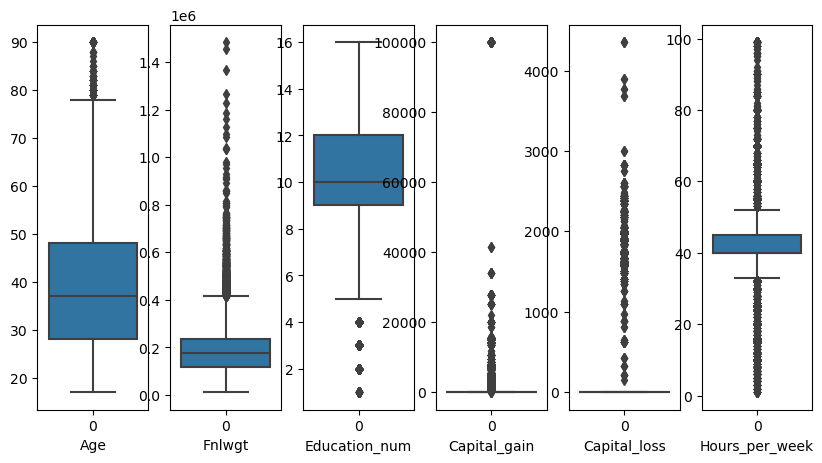

In [13]:
## visulizing outliers

plt.figure(figsize=(10,5))
num = 1
for i in col_int:
    if num <=6:
        ax = plt.subplot(1,6,num)
        sns.boxplot(df[i])
        plt.xlabel(i)
        num +=1
plt.show()

##### Removing outliers

In [14]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.463505,1.008703,0.335272,1.134817,0.405890,0.608366,0.900122,0.393692,0.703036,0.145969,0.216747,2.222450,0.291340,0.563389
1,0.042934,0.090200,0.245008,0.181506,0.420646,1.733664,0.135486,0.277868,0.393692,0.703036,0.145969,0.216747,0.035664,0.291340,0.563389
2,1.056935,0.090200,0.425720,2.402383,1.198377,0.405890,0.135486,0.900122,1.962450,0.703036,0.145969,0.216747,0.035664,0.291340,0.563389
3,0.776180,0.090200,1.408036,0.335272,1.134817,0.405890,0.810273,2.211146,1.962450,1.422403,0.145969,0.216747,0.035664,4.056085,0.563389
4,0.116259,0.090200,0.898091,0.439895,1.523683,0.405890,0.608366,2.211146,0.393692,1.422403,0.145969,0.216747,0.035664,0.291340,0.563389


In [15]:
np.where(z>3)

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [16]:
print(z.iloc[3,13],z.iloc[9,12])

4.05608471780816 3.204018209367117


In [17]:
df = df[(z<3).all(axis=1)]
df.shape

(27399, 15)

* dataset have more than 15% outliers that's we have tom drop it beacuse it is affect accuracy

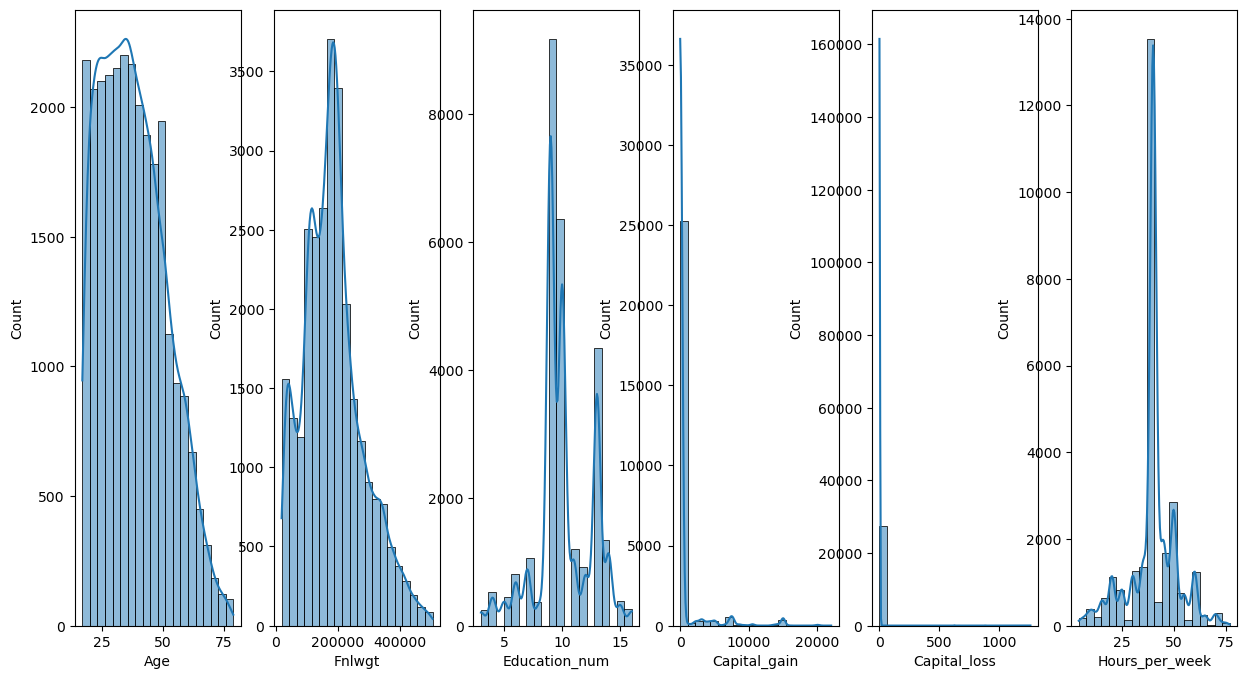

In [18]:
### visulizing skewness

plt.figure(figsize=(15,8))
num = 1
for i in col_int:
    if num <=6:
        ax = plt.subplot(1,6,num)
        sns.histplot(df[i],kde=True,bins=20)
        plt.xlabel(i)
        num +=1
plt.show()

* Age and Fnlwgt have skewness 

##### Removing skewness

In [19]:
df["Age"] = np.sqrt(df["Age"])
df["Fnlwgt"] = np.sqrt(df["Fnlwgt"])

<Axes: xlabel='Fnlwgt', ylabel='Count'>

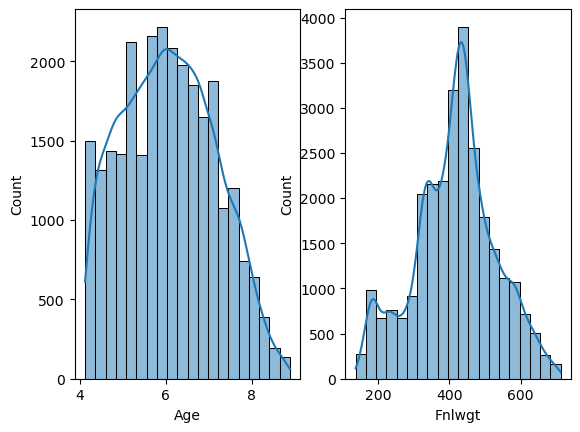

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2)
sns.histplot(df["Age"],kde=True,ax=ax[0],bins=20)
sns.histplot(df["Fnlwgt"],kde=True,ax=ax[1],bins=20)

In [21]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,6,288.636450,9,13,2,4,0,4,1,0,0,13,39,0
1,6.164414,4,464.377002,11,9,0,6,1,4,1,0,0,40,39,0
2,7.280110,4,484.480134,1,7,2,6,0,2,1,0,0,40,39,0


<Axes: >

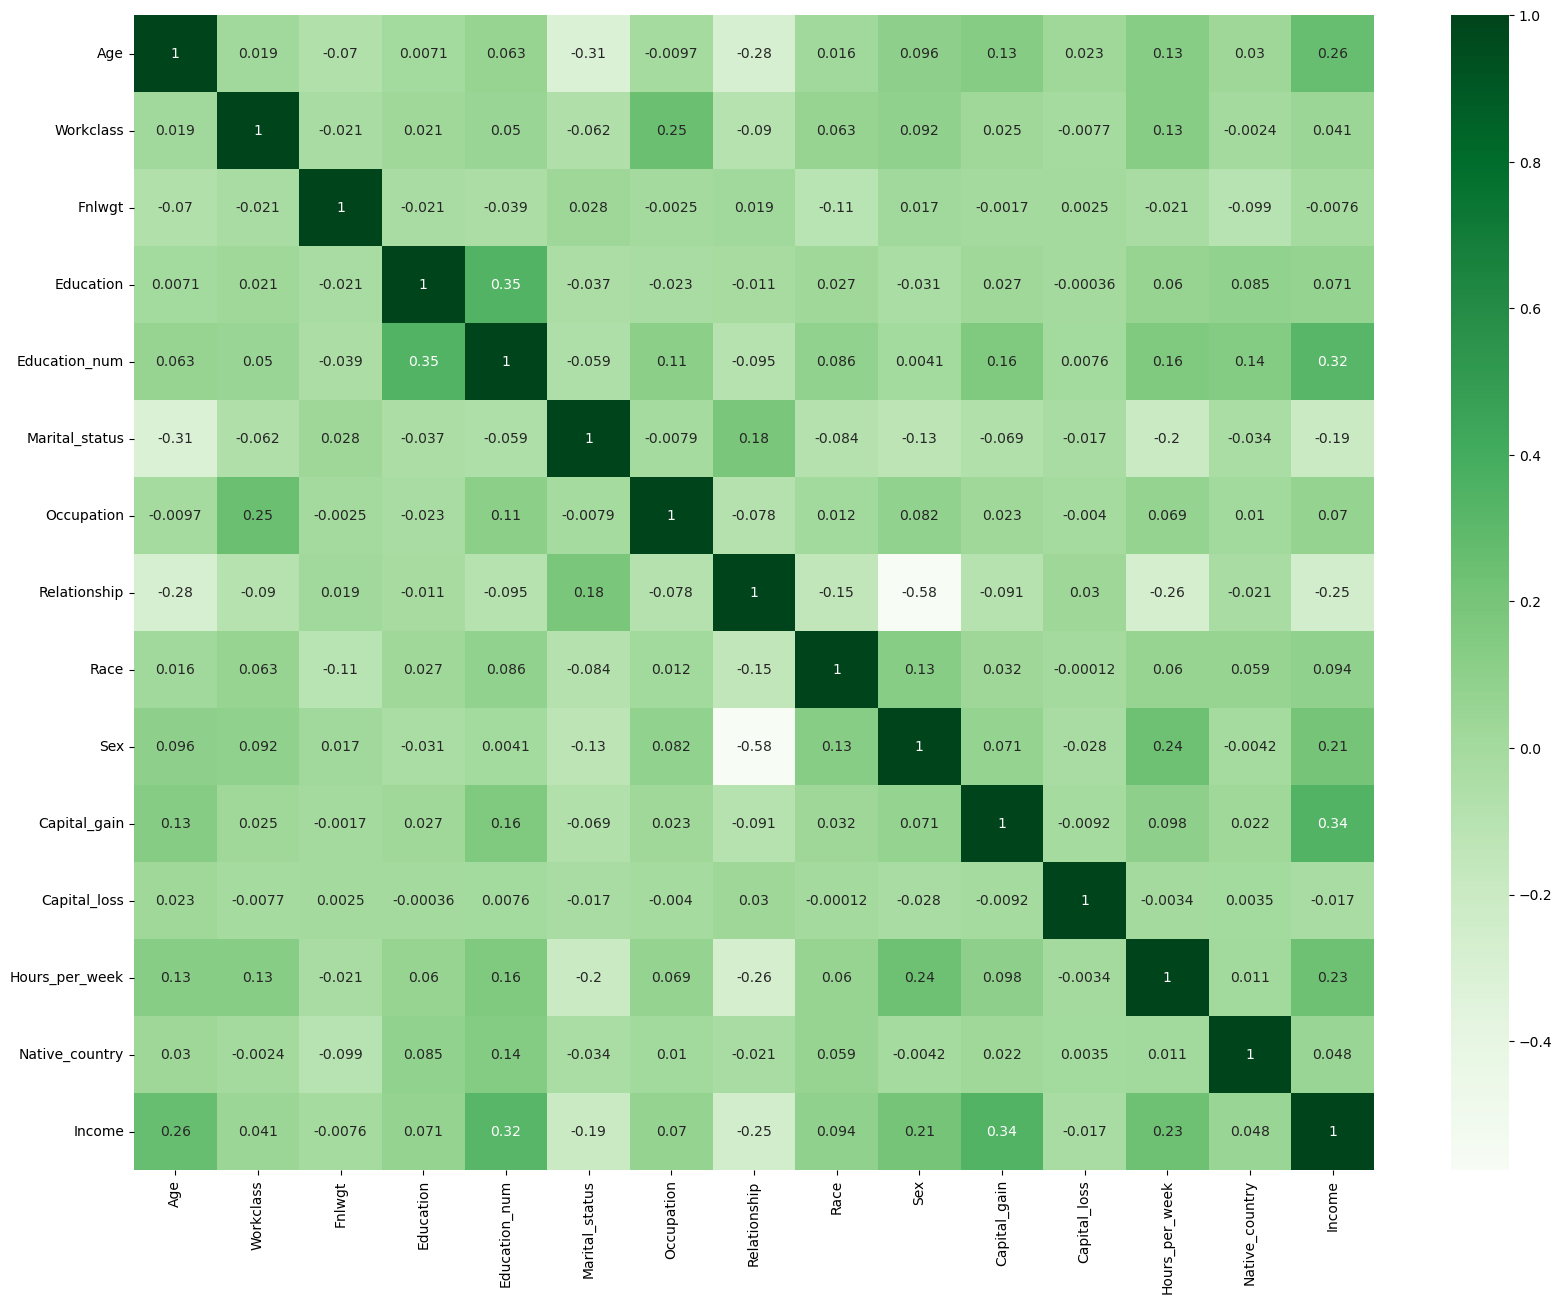

In [22]:
plt.figure(figsize=(20,15))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True,cmap="Greens")

* Here no one feature are correleted only sex and reletionship is only have negetive coreletion

In [23]:
### spliting data into input and target
x= df.iloc[:,:-1]
x.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,6,288.636450,9,13,2,4,0,4,1,0,0,13,39
1,6.164414,4,464.377002,11,9,0,6,1,4,1,0,0,40,39
2,7.280110,4,484.480134,1,7,2,6,0,2,1,0,0,40,39


In [24]:
y= df.iloc[:,-1]
y.head(3)

0    0
1    0
2    0
Name: Income, dtype: int32

###### VIF

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
### Creating function for vif
def vif(x):
    vif = pd.DataFrame()
    vif["ver"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [27]:
vif(x)

,ver,VIF
0,Age,33.243966
1,Workclass,8.736370
2,Fnlwgt,13.266367
3,Education,9.280710
4,Education_num,22.649873
5,Marital_status,4.264414
6,Occupation,3.671179
7,Relationship,2.873213
8,Race,37.593556
9,Sex,4.506192


In [28]:
x.drop(["Native_country","Race","Age"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,Workclass,8.202525
1,Fnlwgt,11.242166
2,Education,9.018881
3,Education_num,18.551589
4,Marital_status,3.863105
5,Occupation,3.660961
6,Relationship,2.564538
7,Sex,4.226659
8,Capital_gain,1.097057
9,Capital_loss,1.003210


**Feature selection**

In [29]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [30]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [31]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [32]:
selected_feat = x.columns[(model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 11
feature selected: 11


In [33]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,6,288.636450,9,13,2,4,0,1,0,0,13
1,4,464.377002,11,9,0,6,1,1,0,0,40
2,4,484.480134,1,7,2,6,0,1,0,0,40
4,4,533.462276,12,14,2,4,5,0,0,0,40
5,4,400.233682,6,5,3,8,1,0,0,0,16


### feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
smt = StandardScaler()

x_new = smt.fit_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)
x.head(3)

,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,1.474081,-1.124100,-0.345483,1.221822,-0.402967,-0.599341,-0.915307,0.714844,-0.24497,-0.037465,-2.413051
1,0.092929,0.422683,0.170201,-0.438440,-1.718613,-0.128201,-0.293012,0.714844,-0.24497,-0.037465,0.007920
2,0.092929,0.599621,-2.408219,-1.268572,-0.402967,-0.128201,-0.915307,0.714844,-0.24497,-0.037465,0.007920


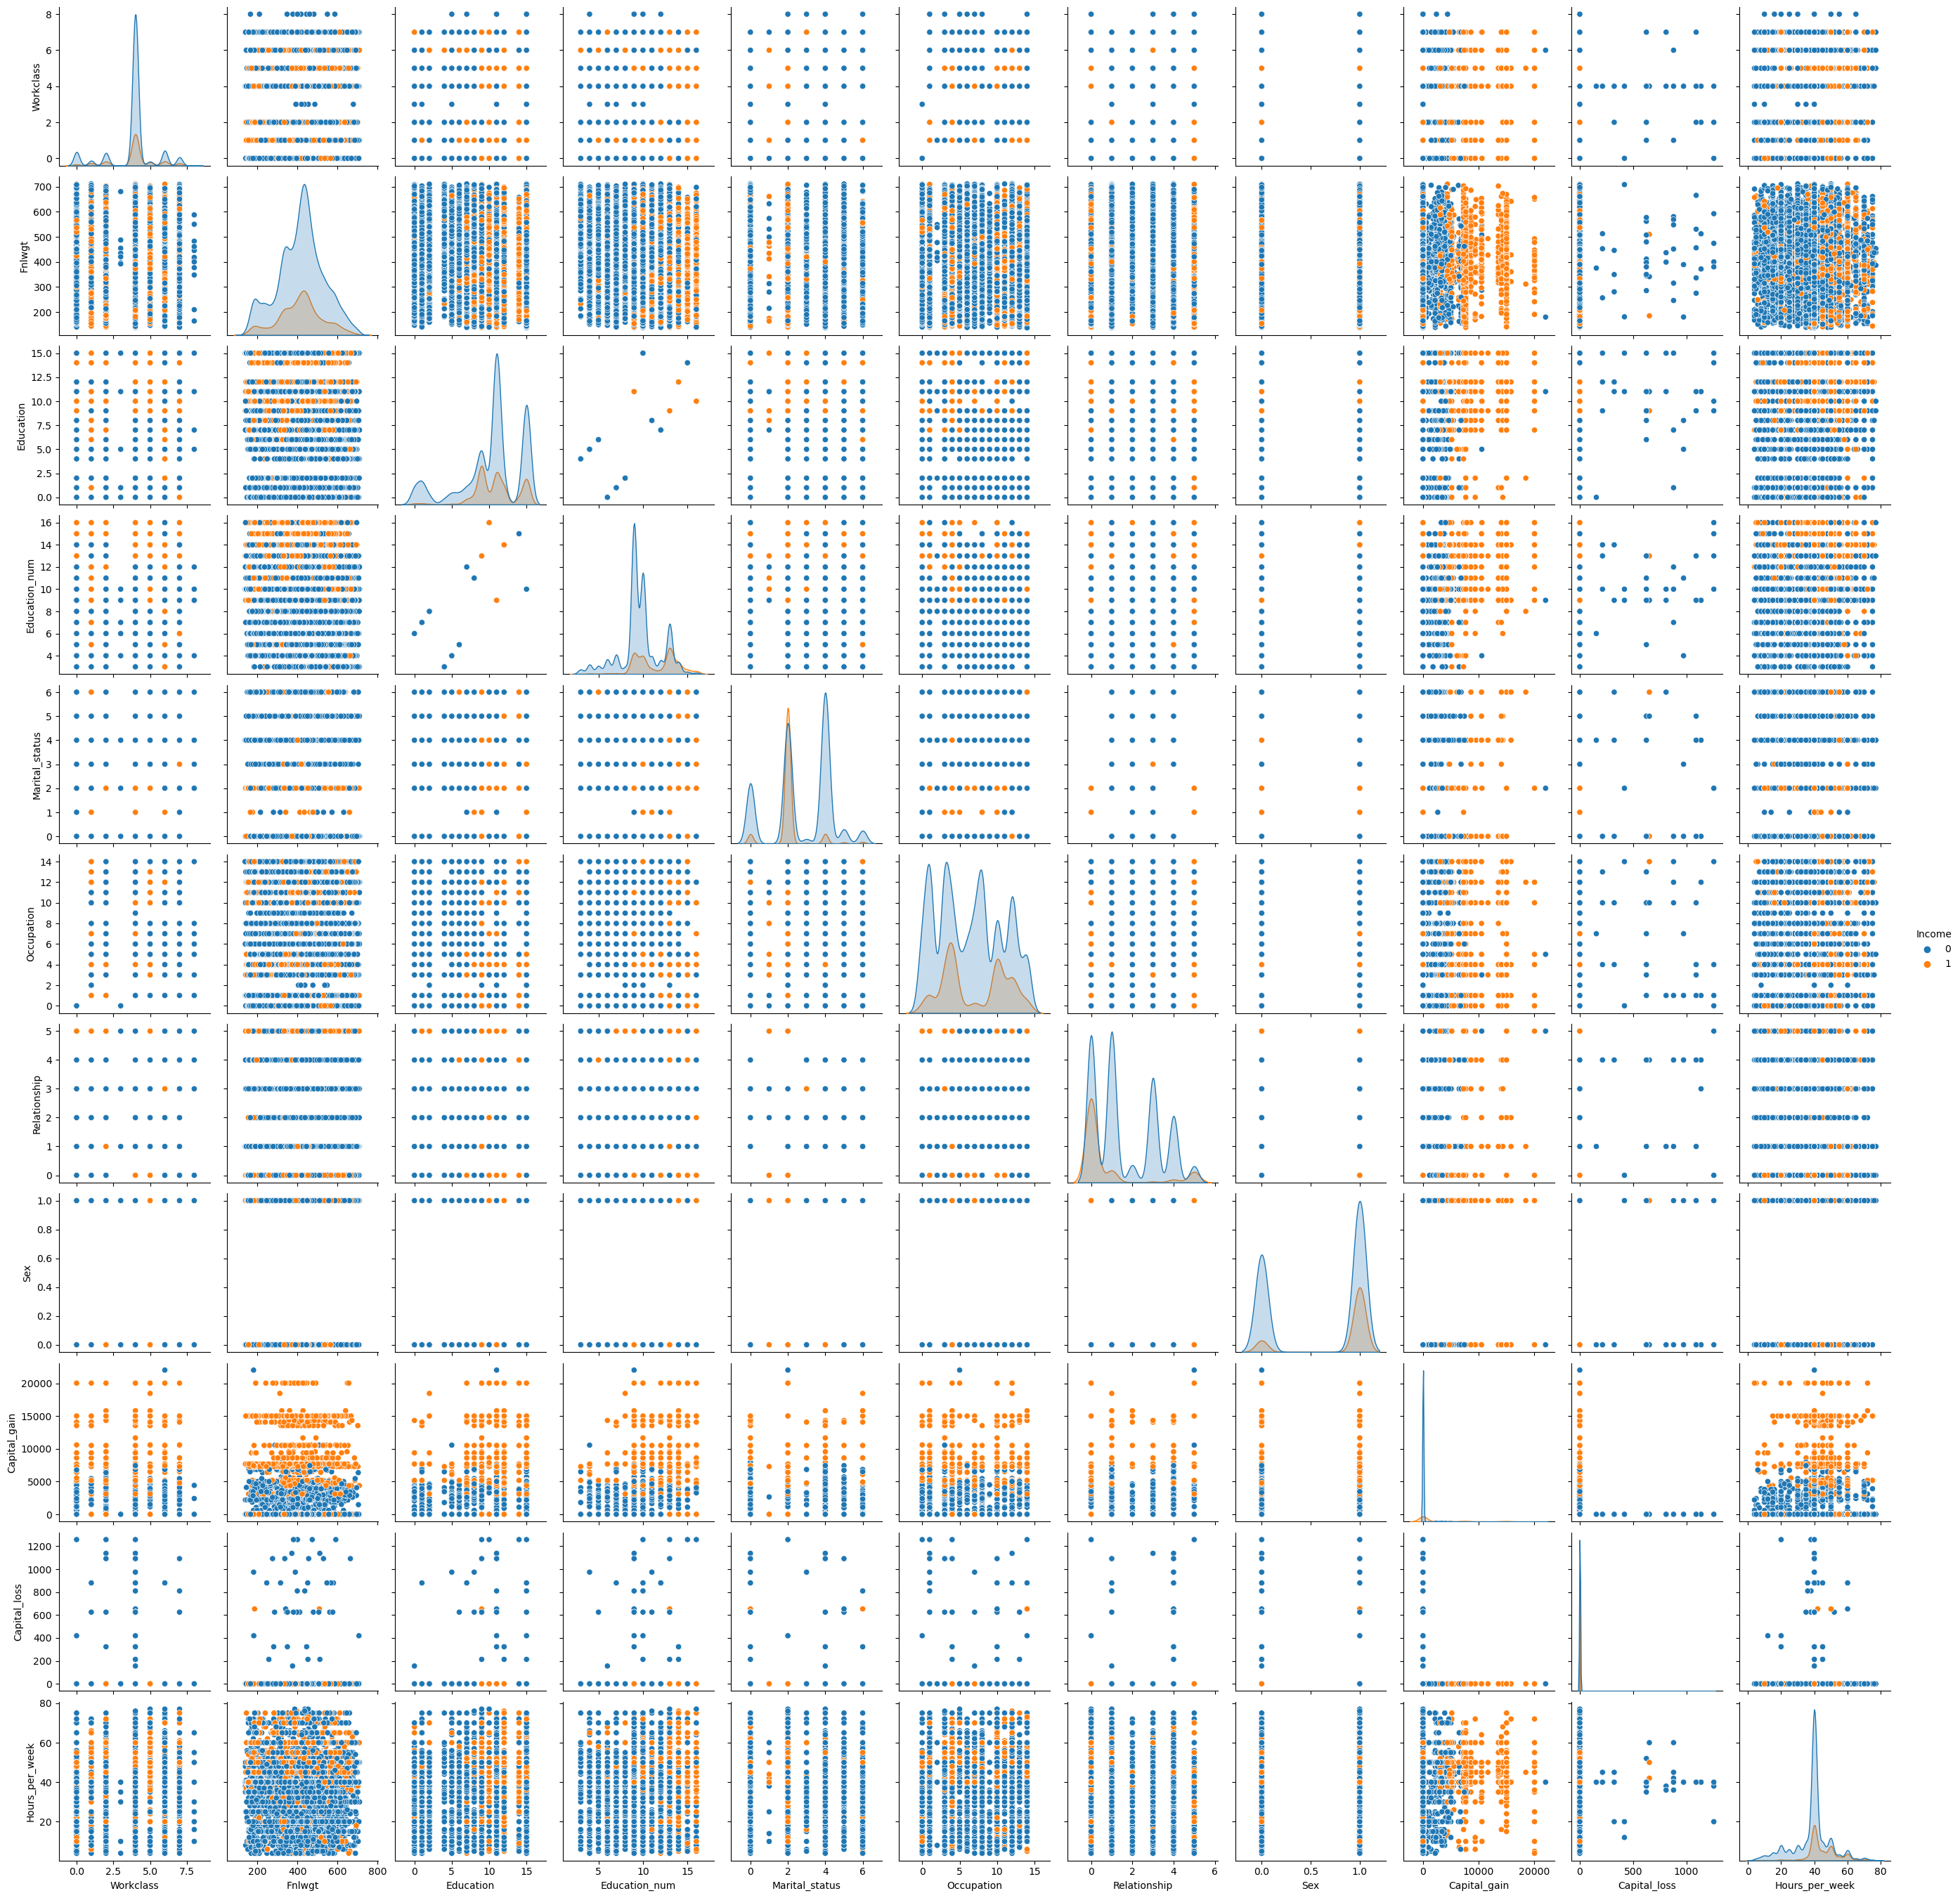

In [35]:
sns.pairplot(df.drop(["Native_country","Race","Age"],axis=1),hue="Income")

###### Handeling Imbalence

In [36]:
y.value_counts()

0    21263
1     6136
Name: Income, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [38]:
print(y.value_counts())

0    21263
1    21263
Name: Income, dtype: int64


###### Spliting data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (34020, 11)
x_test : (8506, 11)
y_train : (34020,)
y_test : (8506,)


###### Handeling Imbalence

In [40]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [41]:
print(y_train.value_counts())

1    17035
0    17035
Name: Income, dtype: int64


### Model Bulding max Temperature

#### LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [43]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [45]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.7520692691517464

confusion_matrix:
 [[12764  4271]
 [ 4176 12859]]

classification_report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     17035
           1       0.75      0.75      0.75     17035

    accuracy                           0.75     34070
   macro avg       0.75      0.75      0.75     34070
weighted avg       0.75      0.75      0.75     34070

<--------------------test data------------------------>
accuracy_score: 0.754878909005408

confusion_matrix:
 [[3184 1094]
 [ 991 3237]]

classification_report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4278
           1       0.75      0.77      0.76      4228

    accuracy                           0.75      8506
   macro avg       0.76      0.75      0.75      8506
weighted avg       0.76      0.75      0.75      8506


ROC AUC Score: 

#### KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [49]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.8932491928382741

confusion_matrix:
 [[14238  2797]
 [  840 16195]]

classification_report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     17035
           1       0.85      0.95      0.90     17035

    accuracy                           0.89     34070
   macro avg       0.90      0.89      0.89     34070
weighted avg       0.90      0.89      0.89     34070

<--------------------test data------------------------>
accuracy_score: 0.8449329884787209

confusion_matrix:
 [[3344  934]
 [ 385 3843]]

classification_report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      4278
           1       0.80      0.91      0.85      4228

    accuracy                           0.84      8506
   macro avg       0.85      0.85      0.84      8506
weighted avg       0.85      0.84      0.84      8506


ROC AUC Score:

#### SVC

In [50]:
from sklearn.svm import SVC

In [51]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [52]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [53]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.8186380980334605

confusion_matrix:
 [[12529  4506]
 [ 1673 15362]]

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80     17035
           1       0.77      0.90      0.83     17035

    accuracy                           0.82     34070
   macro avg       0.83      0.82      0.82     34070
weighted avg       0.83      0.82      0.82     34070

<--------------------test data------------------------>
accuracy_score: 0.8177756877498237

confusion_matrix:
 [[3130 1148]
 [ 402 3826]]

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      4278
           1       0.77      0.90      0.83      4228

    accuracy                           0.82      8506
   macro avg       0.83      0.82      0.82      8506
weighted avg       0.83      0.82      0.82      8506


ROC AUC Score:

#### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [57]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.9998532433225712

confusion_matrix:
 [[17032     3]
 [    2 17033]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17035
           1       1.00      1.00      1.00     17035

    accuracy                           1.00     34070
   macro avg       1.00      1.00      1.00     34070
weighted avg       1.00      1.00      1.00     34070

<--------------------test data------------------------>
accuracy_score: 0.8789090054079474

confusion_matrix:
 [[3767  511]
 [ 519 3709]]

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4278
           1       0.88      0.88      0.88      4228

    accuracy                           0.88      8506
   macro avg       0.88      0.88      0.88      8506
weighted avg       0.88      0.88      0.88      8506


ROC AUC Score:

#### AdaBoostClassifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [60]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [61]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.8320223070149692

confusion_matrix:
 [[13802  3233]
 [ 2490 14545]]

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83     17035
           1       0.82      0.85      0.84     17035

    accuracy                           0.83     34070
   macro avg       0.83      0.83      0.83     34070
weighted avg       0.83      0.83      0.83     34070

<--------------------test data------------------------>
accuracy_score: 0.8343522219609687

confusion_matrix:
 [[3462  816]
 [ 593 3635]]

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4278
           1       0.82      0.86      0.84      4228

    accuracy                           0.83      8506
   macro avg       0.84      0.83      0.83      8506
weighted avg       0.84      0.83      0.83      8506


ROC AUC Score:

#### GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [65]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.8504549457000293

confusion_matrix:
 [[13738  3297]
 [ 1798 15237]]

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84     17035
           1       0.82      0.89      0.86     17035

    accuracy                           0.85     34070
   macro avg       0.85      0.85      0.85     34070
weighted avg       0.85      0.85      0.85     34070

<--------------------test data------------------------>
accuracy_score: 0.8505760639548554

confusion_matrix:
 [[3437  841]
 [ 430 3798]]

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      4278
           1       0.82      0.90      0.86      4228

    accuracy                           0.85      8506
   macro avg       0.85      0.85      0.85      8506
weighted avg       0.85      0.85      0.85      8506


ROC AUC Score:

####  XGBClassifier

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

In [69]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.9012914587613736

confusion_matrix:
 [[14967  2068]
 [ 1295 15740]]

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     17035
           1       0.88      0.92      0.90     17035

    accuracy                           0.90     34070
   macro avg       0.90      0.90      0.90     34070
weighted avg       0.90      0.90      0.90     34070

<--------------------test data------------------------>
accuracy_score: 0.8739713143663297

confusion_matrix:
 [[3662  616]
 [ 456 3772]]

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      4278
           1       0.86      0.89      0.88      4228

    accuracy                           0.87      8506
   macro avg       0.87      0.87      0.87      8506
weighted avg       0.87      0.87      0.87      8506


ROC AUC Score:

* According to roc score and accuracy xgboost is best model for dataset

#### Final Model

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
params = {
    'n_estimators': [100, 300, 500,800,1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5,7,9],
    'min_samples_leaf': [1,2,3,5.7,9],
    'max_leaf_nodes': [10,20,50,None]
}

In [72]:
xgb_cv = GridSearchCV(estimator=xgb,param_grid=params,cv=5,scoring="f1",verbose=1)
xgb_cv.fit(x_train,y_train)

print('Best score:', xgb_cv.best_score_)
print('Best score:', xgb_cv.best_params_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best score: 0.8758838363145864
Best score: {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [73]:
y_train_pred = xgb_cv.predict(x_train)
y_test_pred = xgb_cv.predict(x_test)

In [74]:
print("<--------------------train data------------------------>")
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))
print("<--------------------test data------------------------>")
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred),end="\n")
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))
print("\nROC AUC Score:",roc_auc_score(y_test,y_test_pred))

<--------------------train data------------------------>
accuracy_score: 0.9307308482535955

confusion_matrix:
 [[15625  1410]
 [  950 16085]]

classification_report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     17035
           1       0.92      0.94      0.93     17035

    accuracy                           0.93     34070
   macro avg       0.93      0.93      0.93     34070
weighted avg       0.93      0.93      0.93     34070

<--------------------test data------------------------>
accuracy_score: 0.8791441335527863

confusion_matrix:
 [[3731  547]
 [ 481 3747]]

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4278
           1       0.87      0.89      0.88      4228

    accuracy                           0.88      8506
   macro avg       0.88      0.88      0.88      8506
weighted avg       0.88      0.88      0.88      8506


ROC AUC Score:

##### Saving Model

In [80]:
import joblib

joblib.dump(xgb_cv,"Census Income.obj")

['Census Income.obj']

In [81]:
Census_Income = joblib.load("Census Income.obj")

##### Prediction

In [82]:
pred_val = (df.loc[:,['Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week',"Income"]]).sample(10)
pred_val

,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
11561,470.289273,9,13,2,3,0,1,0,0,40,1
21784,244.951016,15,10,2,12,0,1,0,0,40,1
21472,417.047959,10,16,3,10,1,1,0,0,25,1
15516,250.091983,9,13,2,4,0,1,0,0,40,1
25236,311.939097,9,13,4,1,1,0,0,0,48,0
29299,302.874561,9,13,4,13,3,0,3325,0,40,0
24999,402.527018,1,7,0,12,4,0,0,0,44,0
13738,349.126052,15,10,4,12,3,0,0,0,20,0
30105,353.553391,9,13,2,1,0,1,0,0,40,1
21516,537.183395,9,13,2,13,0,1,0,0,43,1


In [83]:
input_val = pred_val.drop("Income",axis=1)

In [84]:
Census_Income.predict(input_val)

ValueError: feature_names mismatch: ['Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] ['Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
expected Workclass in input data